In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

In [3]:
dtm = pd.read_csv("DTM.csv")

In [4]:
display(dtm)

,Unnamed: 0,docnum,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,...,Topic112,Topic113,Topic114,Topic115,Topic116,Topic117,Topic118,Topic119,Topic120,meta
0,1,1,0.000336,0.000485,0.000394,0.000510,0.000195,0.000264,0.000980,0.000204,...,0.008732,0.009710,0.000201,0.017709,0.005965,0.000316,0.000193,0.055029,0.000935,20
1,2,2,0.000167,0.001292,0.000604,0.000285,0.000025,0.001127,0.000114,0.013377,...,0.005263,0.104050,0.000436,0.015238,0.000202,0.000299,0.056658,0.007871,0.000898,108
2,3,3,0.000376,0.000198,0.000344,0.000823,0.000055,0.001650,0.000425,0.000544,...,0.005800,0.001287,0.001152,0.002339,0.000393,0.000153,0.026729,0.044357,0.000972,157
3,4,4,0.001108,0.000166,0.000406,0.001311,0.000730,0.001153,0.000110,0.001302,...,0.004000,0.001217,0.000849,0.001968,0.001846,0.000171,0.025166,0.086968,0.000802,195
4,5,5,0.000409,0.000099,0.000039,0.000064,0.000252,0.000829,0.000267,0.005635,...,0.003280,0.000616,0.000088,0.011276,0.001012,0.000085,0.001305,0.005271,0.000403,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42543,42544,42544,0.004089,0.000253,0.000177,0.002206,0.000133,0.000713,0.000753,0.001552,...,0.004446,0.001138,0.001441,0.006322,0.001032,0.000215,0.004742,0.028907,0.000872,5415254
42544,42545,42545,0.000480,0.000361,0.000194,0.000517,0.002535,0.000498,0.000045,0.001773,...,0.004960,0.016416,0.000345,0.007435,0.001698,0.000448,0.050970,0.010608,0.000988,5415268
42545,42546,42546,0.000304,0.000343,0.000097,0.000107,0.000029,0.001112,0.000173,0.001700,...,0.004668,0.001067,0.008672,0.003586,0.000218,0.000045,0.006744,0.002242,0.001053,5415341
42546,42547,42547,0.006488,0.000127,0.000065,0.000074,0.000021,0.000197,0.000170,0.000408,...,0.002508,0.000916,0.000336,0.002833,0.000603,0.000045,0.050094,0.159710,0.000450,5415354


In [6]:
df = pd.read_csv("data/df_full.csv")

In [8]:
dtm.drop(['Unnamed: 0', 'docnum'], axis=1, inplace=True)

In [9]:
dtm['sum'] = np.nan

In [10]:
cols_to_search = [col for col in dtm.columns if col not in ['sum', 'meta']]
dtm['highestscoretopic'] = dtm[cols_to_search].idxmax(axis=1)
# now we'll have to group these by coordinates and choose a most common topic

In [11]:
climatejusticetopics = ["Topic12","Topic21","Topic25","Topic44","Topic50","Topic56","Topic80","Topic81","Topic83","Topic87","Topic89","Topic91","Topic101","Topic118","Topic119"]
dtm['sum'] = dtm[climatejusticetopics].sum(axis=1)

In [12]:
tsne = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init="pca")
cols_to_exclude = ['meta','sum','highestscoretopic']
# 100-D -> 2-D
tsne_results = tsne.fit_transform(dtm.loc[:, ~dtm.columns.isin(cols_to_exclude)]) 
# check that this array follows the same order as dtm rows 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42548 samples in 0.008s...
[t-SNE] Computed neighbors for 42548 samples in 53.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42548
[t-SNE] Computed conditional probabilities for sample 2000 / 42548
[t-SNE] Computed conditional probabilities for sample 3000 / 42548
[t-SNE] Computed conditional probabilities for sample 4000 / 42548
[t-SNE] Computed conditional probabilities for sample 5000 / 42548
[t-SNE] Computed conditional probabilities for sample 6000 / 42548
[t-SNE] Computed conditional probabilities for sample 7000 / 42548
[t-SNE] Computed conditional probabilities for sample 8000 / 42548
[t-SNE] Computed conditional probabilities for sample 9000 / 42548
[t-SNE] Computed conditional probabilities for sample 10000 / 42548
[t-SNE] Computed conditional probabilities for sample 11000 / 42548
[t-SNE] Computed conditional probabilities for sample 12000 / 42548
[t-SNE] Computed conditional probabilities for sa

In [13]:
df1 = pd.DataFrame()
df1["id"] = dtm["meta"]
df1["comp-1"] = tsne_results[:,0]
df1["comp-2"] = tsne_results[:,1]
df1 = pd.merge(df1, df[["id","first_author_female","last_author_female","majority_female_binary"]], on="id", how='left')

In [14]:
dtm.rename(columns = {"meta":"id"}, inplace=True)
df1 = pd.merge(df1, dtm[["id","highestscoretopic","sum"]], on="id", how='left')
df1.rename(columns = {"highestscoretopic":"topic", "sum":"climatejusticescore"}, inplace=True)
display(df1)

,id,comp-1,comp-2,first_author_female,last_author_female,majority_female_binary,topic,climatejusticescore
0,20,-6.827012,43.530376,unknown,unknown,unknown,Topic68,0.090797
1,108,13.140246,20.787085,1.0,0.0,unknown,Topic78,0.272802
2,157,32.998978,20.011883,0.0,0.0,0.0,Topic91,0.440953
3,195,20.072718,5.684520,1.0,1.0,1.0,Topic45,0.294310
4,222,-6.735416,-18.007849,1.0,1.0,1.0,Topic108,0.045385
...,...,...,...,...,...,...,...,...
42543,5415254,10.971690,36.033791,unknown,unknown,0.0,Topic84,0.260547
42544,5415268,19.439703,-40.749409,unknown,unknown,0.0,Topic27,0.132807
42545,5415341,5.020032,-28.502401,unknown,unknown,0.5,Topic65,0.106981
42546,5415354,41.296196,-33.440475,unknown,unknown,0.0,Topic34,0.286833


In [15]:
df1.to_csv("tsne.csv")

<AxesSubplot:xlabel='comp-1', ylabel='comp-2'>

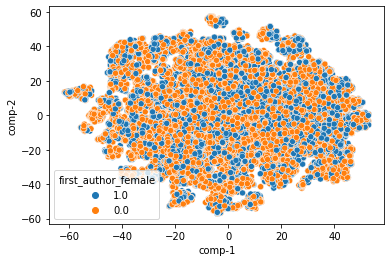

In [23]:
# Create the scatterplot with color based on "first_author_female" column
df1_filtered = df1[df1["first_author_female"] != "unknown"]
sns.scatterplot(x="comp-1", y="comp-2", hue="first_author_female", data=df1_filtered)